In [44]:
# # Mount our Google Drive
# from google.colab import drive

# drive.mount('/content/drive')

In [45]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("../../data/movie-data-csv/tmdb.csv", low_memory=False)
df.head(2).T

,0,1
adult,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN
budget,30000000,65000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
homepage,http://toystory.disney.com/toy-story,NaN
id,862,8844
imdb_id,tt0114709,tt0113497
original_language,en,en
original_title,Toy Story,Jumanji
plot,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...


### Data Understanding

In [47]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'plot', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [48]:
df.shape

(45466, 24)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   plot                   44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [50]:
missing_info = df.isnull().sum().to_frame(name='Null Count')
missing_info['Null Percentage (%)'] = (df.isnull().mean() * 100).round(2)
missing_info = missing_info.sort_values(by='Null Count', ascending=False)
missing_info

,Null Count,Null Percentage (%)
belongs_to_collection,40972,90.12
homepage,37684,82.88
tagline,25054,55.10
plot,954,2.10
poster_path,386,0.85
runtime,263,0.58
status,87,0.19
release_date,87,0.19
imdb_id,17,0.04
original_language,11,0.02


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


### Data Transformation

In [52]:
import ast
import random

In [53]:
n = random.randint(0, df.shape[0] - 1)
df['genres'][n]

"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}, {'id': 10769, 'name': 'Foreign'}]"

In [54]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['genres'] = df['genres'].apply(lambda genre_list: [genre['name'].lower() for genre in genre_list] if isinstance(genre_list, list) else [])

In [55]:
df['genres'][n]

['drama', 'action', 'thriller', 'crime', 'foreign']

In [56]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,plot,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[animation, comedy, family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[adventure, fantasy, family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[romance, comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[comedy, drama, romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [57]:
df = df[['adult', 'budget', 'genres', 'original_language', 'title', 'plot',
         'popularity', 'release_date', 'revenue', 'vote_average', 'vote_count']]
df.head()

,adult,budget,genres,original_language,title,plot,popularity,release_date,revenue,vote_average,vote_count
0,False,30000000,"[animation, comedy, family]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,7.7,5415.0
1,False,65000000,"[adventure, fantasy, family]",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,6.9,2413.0
2,False,0,"[romance, comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,6.5,92.0
3,False,16000000,"[comedy, drama, romance]",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,6.1,34.0
4,False,0,[comedy],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,5.7,173.0


Check how many movies were not for adult

In [58]:
# Convert to string, lowercase, and strip whitespace
df['adult'] = df['adult'].astype(str).str.strip().str.lower()
# Keep only valid 'true' or 'false' strings
df = df[df['adult'].isin(['true', 'false'])]
# Convert to boolean safely using .loc to avoid warnings
df.loc[:, 'adult'] = df['adult'].map({'false': False, 'true': True})

In [59]:
df['adult'].value_counts()

adult
False    45454
True         9
Name: count, dtype: int64

Maximum and Minimum  budget

In [60]:
print("Maximum budget : ", df['budget'].max())
print("Minimun budget : ", df['budget'].min())

Maximum budget :  998000
Minimun budget :  0


Movie Langauge Type

In [61]:
df['original_language'].value_counts().head(8)

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
Name: count, dtype: int64

Maximum and minimum movie released year

In [62]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df = df.dropna(subset=['release_date'])

latest_movie_year = df['release_date'].max().year
oldest_movie_year = df['release_date'].min().year

print(f"Latest release year of a movie: {latest_movie_year}")
print(f"Oldest release year of a movie: {oldest_movie_year}")

Latest release year of a movie: 2020
Oldest release year of a movie: 1874


Check the maximum and minimum number of genres a particular movie has

In [63]:
# Calculate the number of genres for each movie
genre_counts = df['genres'].apply(len)

# Find the max and min number of genres
max_genres = genre_counts.max()
min_genres = genre_counts.min()

print(f"Maximum number of genres for a movie: {max_genres}")
print(f"Minimum number of genres for a movie: {min_genres}")

Maximum number of genres for a movie: 8
Minimum number of genres for a movie: 0


Check the maximum and minimum length of plot description

In [64]:
# Calculate the length of each description
description_lengths = df['plot'].str.len()

max_length = description_lengths.max()
min_length = description_lengths.min()

print(f"Maximum plot description length: {max_length}")
print(f"Minimum plot description length: {min_length}")

Maximum plot description length: 1000.0
Minimum plot description length: 1.0


### Exploratory Data Analysis

In [65]:
df.head()

,adult,budget,genres,original_language,title,plot,popularity,release_date,revenue,vote_average,vote_count
0,False,30000000,"[animation, comedy, family]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,7.7,5415.0
1,False,65000000,"[adventure, fantasy, family]",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,6.9,2413.0
2,False,0,"[romance, comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,6.5,92.0
3,False,16000000,"[comedy, drama, romance]",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,6.1,34.0
4,False,0,[comedy],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,5.7,173.0


Budget vs Revenue

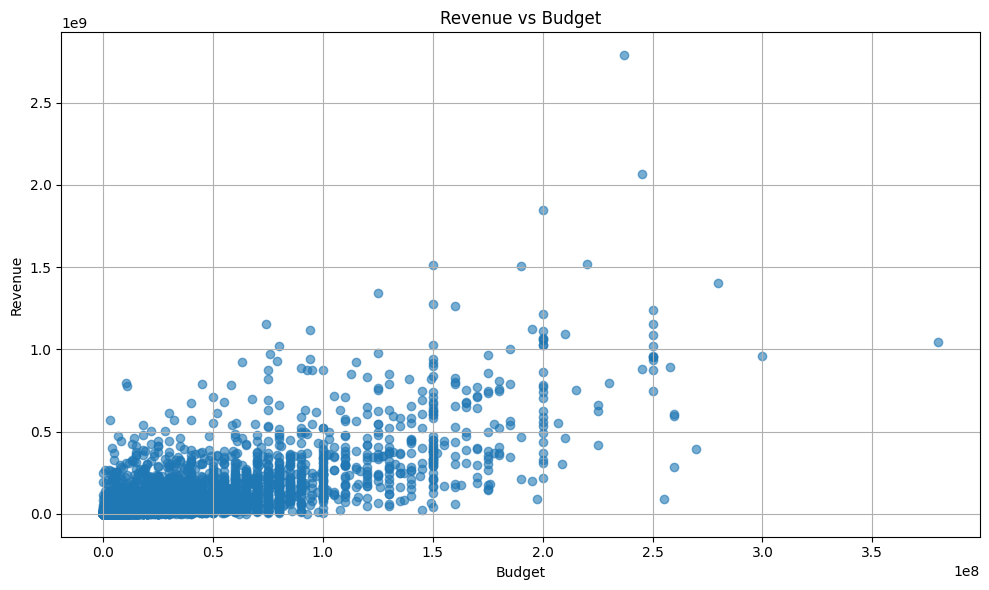

In [66]:
# Convert budget and revenue to numeric (coerce errors to NaN)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
# Now filter out rows with valid budget and revenue
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0)]
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['budget'], df_filtered['revenue'], alpha=0.6)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

Pie Chart for original movie language

In [67]:
!pip install pycountry

In [68]:
import pycountry

def get_language_name(code):
    try:
        return pycountry.languages.get(alpha_2=code).name
    except:
        return 'Unknown'

In [69]:
df['original_language'] = df['original_language'].apply(get_language_name)
df['original_language'].unique()

array(['English', 'French', 'Chinese', 'Italian', 'Persian', 'Dutch',
       'German', 'Unknown', 'Arabic', 'Spanish', 'Russian', 'Swedish',
       'Japanese', 'Korean', 'Serbian', 'Bengali', 'Hebrew', 'Portuguese',
       'Wolof', 'Romanian', 'Hungarian', 'Welsh', 'Vietnamese', 'Czech',
       'Danish', 'Norwegian', 'Norwegian Bokmål', 'Polish',
       'Modern Greek (1453-)', 'Serbo-Croatian', 'Macedonian', 'Tibetan',
       'Catalan', 'Finnish', 'Thai', 'Slovak', 'Bosnian', 'Hindi',
       'Turkish', 'Icelandic', 'Pushto', 'Abkhazian', 'Esperanto',
       'Georgian', 'Mongolian', 'Bambara', 'Zulu', 'Ukrainian',
       'Afrikaans', 'Latin', 'Estonian', 'Kurdish', 'Western Frisian',
       'Latvian', 'Tamil', 'Slovenian', 'Tagalog', 'Urdu', 'Kinyarwanda',
       'Indonesian', 'Bulgarian', 'Marathi', 'Lithuanian', 'Kazakh',
       'Malay (macrolanguage)', 'Albanian', 'Quechua', 'Telugu',
       'Amharic', 'Javanese', 'Tajik', 'Malayalam', 'Croatian', 'Lao',
       'Aymara', 'Kannada', '

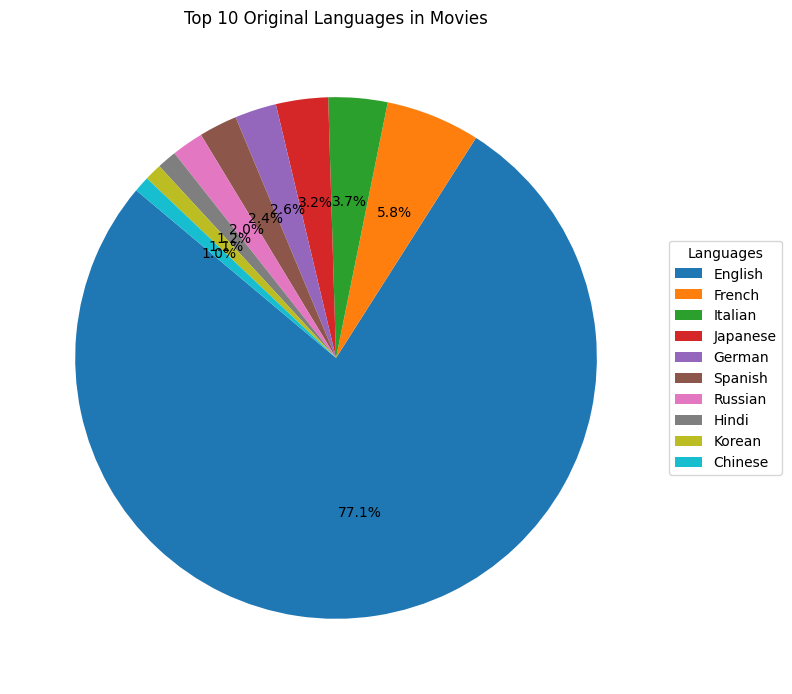

In [70]:
lang_counts = df['original_language'].value_counts()
top_10_langs = lang_counts.head(10)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_10_langs,
    autopct='%1.1f%%',
    startangle=140
)
plt.legend(
    wedges,
    top_10_langs.index,
    title="Languages",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Top 10 Original Languages in Movies')
plt.tight_layout()
plt.show()

Correlation Matrix

In [71]:
cols_to_numeric = ['budget', 'revenue', 'vote_average', 'vote_count', 'popularity']
df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

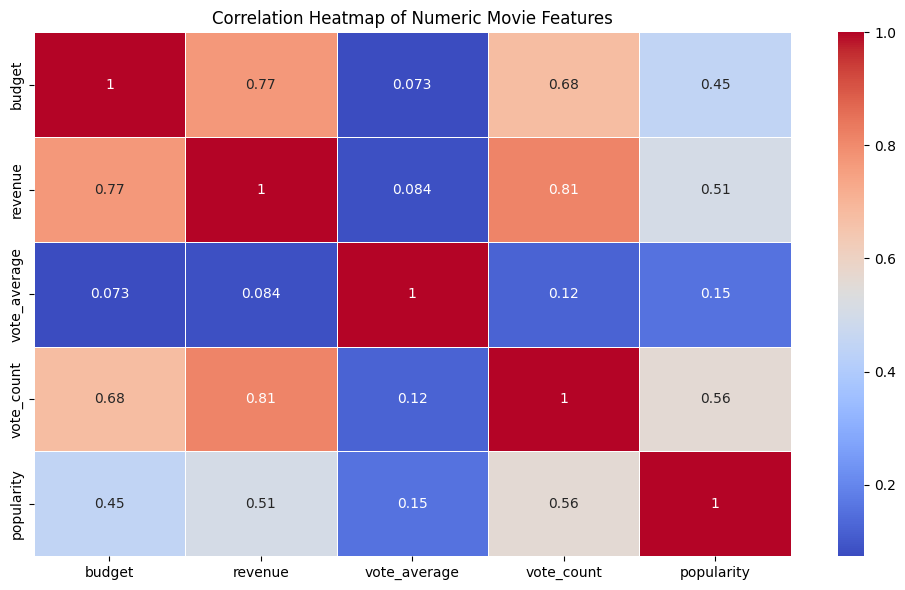

In [72]:
# Compute correlation
correlation_matrix = df[cols_to_numeric].corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Movie Features")
plt.tight_layout()
plt.show()

Check distribution of each individual genres

In [73]:
from collections import Counter

all_genres = df['genres'].dropna().sum()
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)
genre_df['Percentage (%)'] = (genre_df['Count'] / genre_df['Count'].sum()) * 100
genre_df

,Genre,Count,Percentage (%)
0,drama,20255,22.249440
1,comedy,13181,14.478887
2,thriller,7619,8.369217
3,romance,6733,7.395975
4,action,6592,7.241091
5,horror,4670,5.129839
6,crime,4305,4.728898
7,documentary,3921,4.307087
8,adventure,3494,3.838042
9,science fiction,3042,3.341535


Genre distribution plot by Count


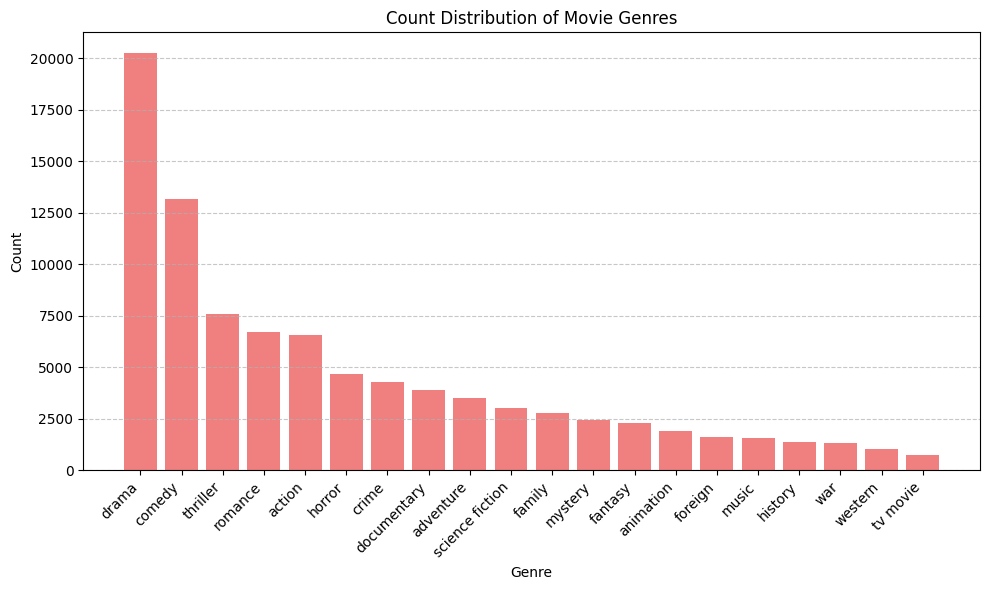

In [74]:
# Plotting the distribution by percentage
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
print("Genre distribution plot by Count")

Most Common Genre Combinations

In [75]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
genre_set_counts.head(20)

genres
[drama]                     4998
[comedy]                    3621
[documentary]               2713
[]                          2384
[comedy, drama]             1667
[drama, romance]            1644
[comedy, romance]           1143
[horror]                     974
[horror, thriller]           680
[thriller, drama]            677
[drama, crime]               603
[romance, comedy, drama]     593
[thriller]                   465
[thriller, drama, crime]     428
[history, drama]             362
[western]                    318
[drama, war]                 308
[action, thriller]           301
[drama, foreign]             298
[documentary, music]         292
Name: count, dtype: int64

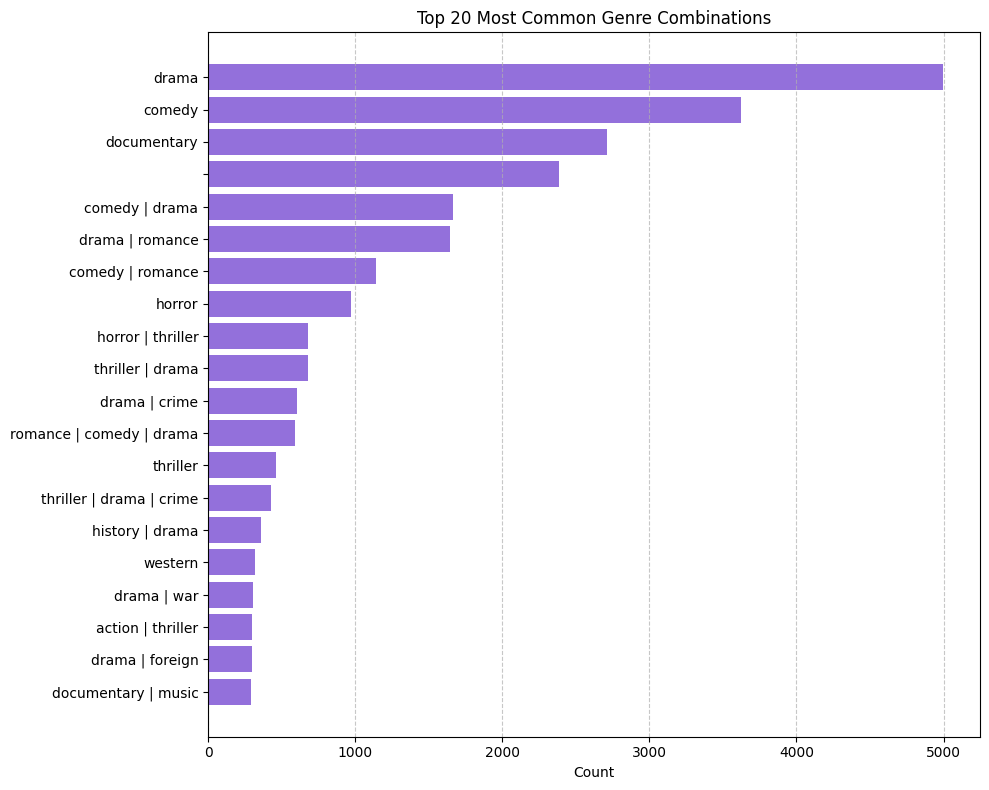

In [76]:
top_20_genres = genre_set_counts.head(20)
labels = [' | '.join(g) for g in top_20_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_20_genres.values, color='mediumpurple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Genre Combinations (With more than one genre)

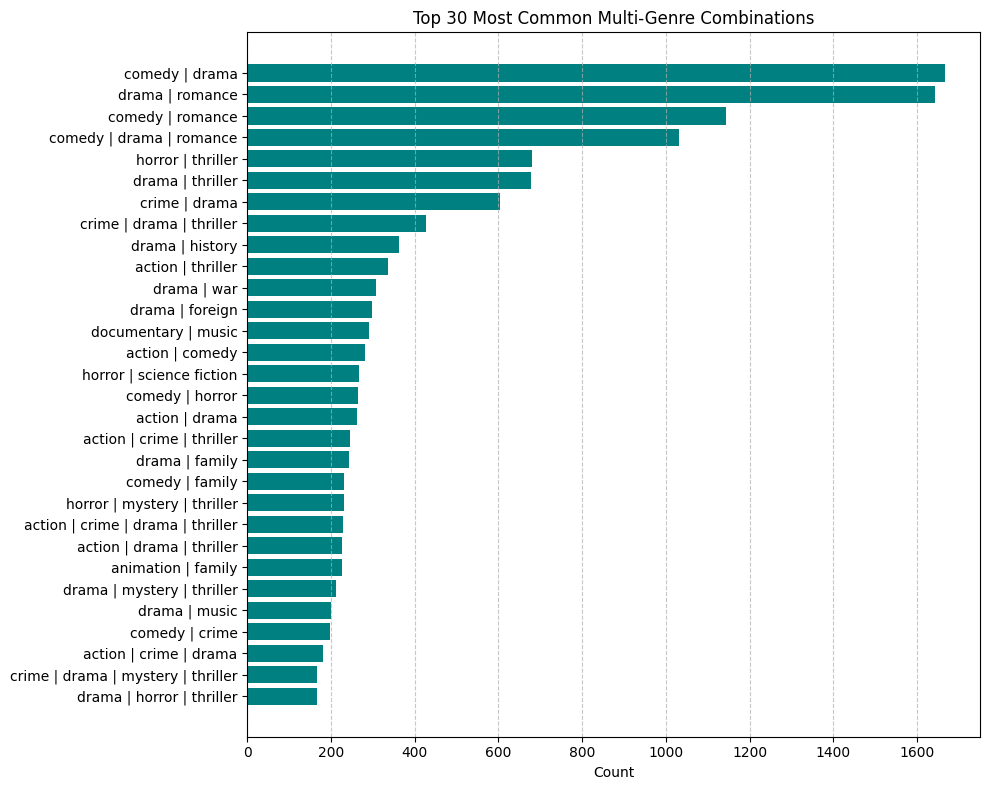

In [77]:
genre_sets = df['genres'].apply(lambda x: frozenset(x))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) > 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(30)
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Top 30 Most Common Multi-Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Single Genre (With more than one genre)

In [78]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) <= 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(20)
top_multi_genres

genres
[drama]              4998
[comedy]             3621
[documentary]        2713
[]                   2384
[horror]              974
[thriller]            465
[western]             318
[action]              278
[animation]           242
[science fiction]     198
[crime]               134
[adventure]           110
[music]               109
[romance]              97
[family]               91
[mystery]              70
[fantasy]              51
[war]                  37
[foreign]              19
[history]              15
Name: count, dtype: int64

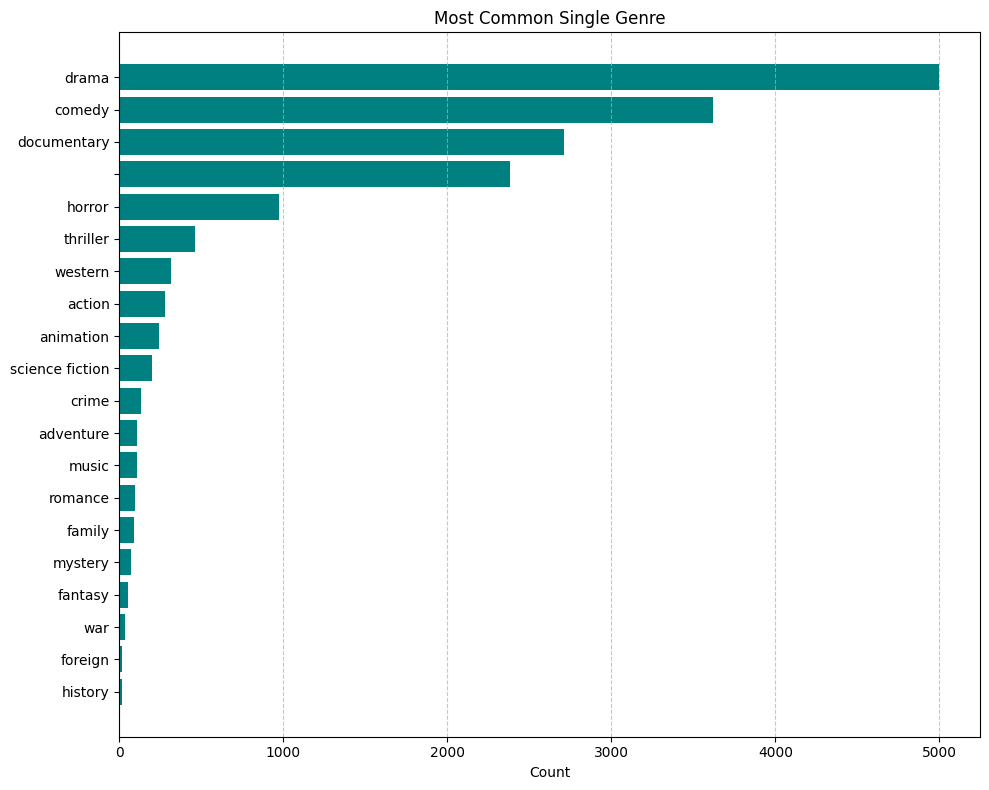

In [79]:
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Most Common Single Genre')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What is the most popular single-labeled genre based on average vote

In [80]:
# Assuming your original dataset is named `df`
df_copy = df.copy()

# Step 1: Explode the genres list so each genre has its own row
df_copy = df_copy.explode('genres')

# Step 2: Group by genre and compute average vote_average and total vote_count
genre_stats = df_copy.groupby('genres').agg({
    'vote_average': 'mean',
    'vote_count': 'sum'
}).reset_index()

# Optional: round for clarity
genre_stats['vote_average'] = genre_stats['vote_average'].round(2)

# Step 3: Sort by vote_count for better visual order
genre_stats = genre_stats.sort_values(by='vote_average', ascending=False)

In [81]:
genre_stats

,genres,vote_average,vote_count
2,animation,6.28,453054.0
10,history,6.16,150095.0
18,war,6.04,159258.0
6,drama,5.91,1955974.0
12,music,5.88,108333.0
4,crime,5.88,758038.0
5,documentary,5.83,50451.0
13,mystery,5.82,408961.0
14,romance,5.80,645636.0
8,fantasy,5.79,769569.0


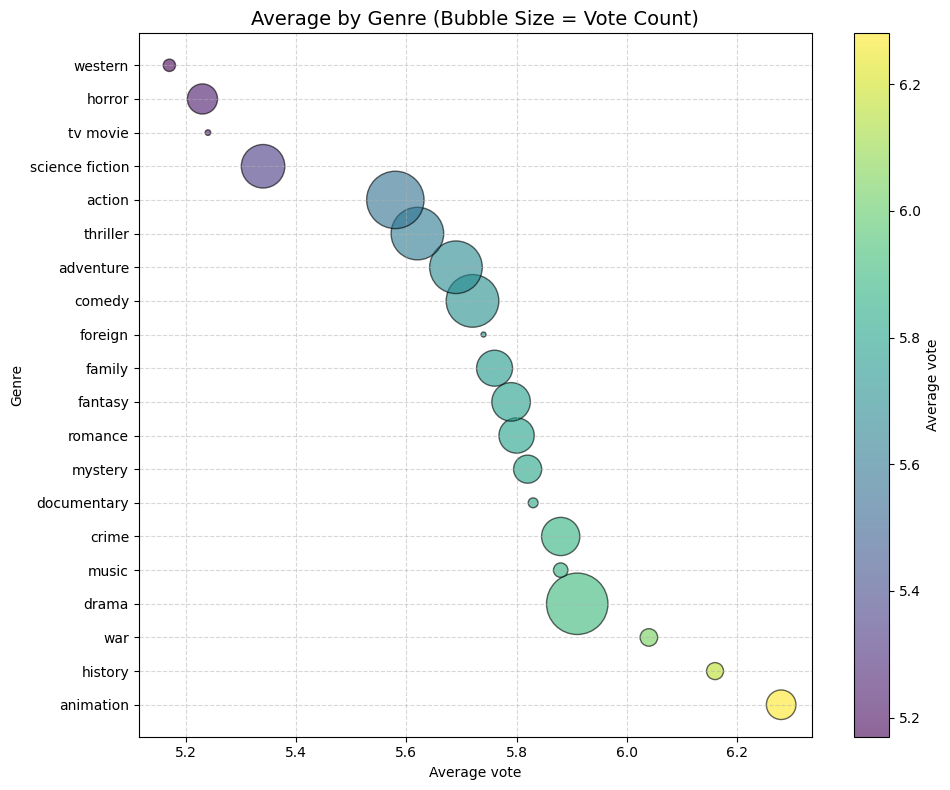

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(
    genre_stats['vote_average'], genre_stats['genres'],
    s=genre_stats['vote_count'] / 1000,  # bubble size
    alpha=0.6, c=genre_stats['vote_average'], cmap='viridis', edgecolor='black'
)

plt.title('Average by Genre (Bubble Size = Vote Count)', fontsize=14)
plt.xlabel('Average vote')
plt.ylabel('Genre')
plt.colorbar(label='Average vote')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

What is the most popular multi-labeled genre based on imdb score ?

In [83]:
multi_genre_df = df[df['genres'].apply(lambda x: len(x) > 1)].copy()
multi_genre_df['genre_combo'] = multi_genre_df['genres'].apply(lambda x: tuple(sorted(x)))
grouped = multi_genre_df.groupby('genre_combo')['vote_average'].agg(['mean', 'count'])
genre_combo_stats = grouped.reset_index()
genre_combo_stats['mean'] = genre_combo_stats['mean'].round(1)
genre_combo_stats.columns = ['genre_combination', 'vote_average', 'vote_count']
genre_combo_stats = genre_combo_stats.sort_values(by='vote_count', ascending=False).reset_index(drop=True)
genre_combo_stats.head(20)

,genre_combination,vote_average,vote_count
0,"(comedy, drama)",6.0,1667
1,"(drama, romance)",5.9,1644
2,"(comedy, romance)",5.5,1143
3,"(comedy, drama, romance)",6.0,1031
4,"(horror, thriller)",5.1,680
5,"(drama, thriller)",5.8,677
6,"(crime, drama)",5.8,603
7,"(crime, drama, thriller)",6.2,428
8,"(drama, history)",6.2,362
9,"(action, thriller)",5.4,337


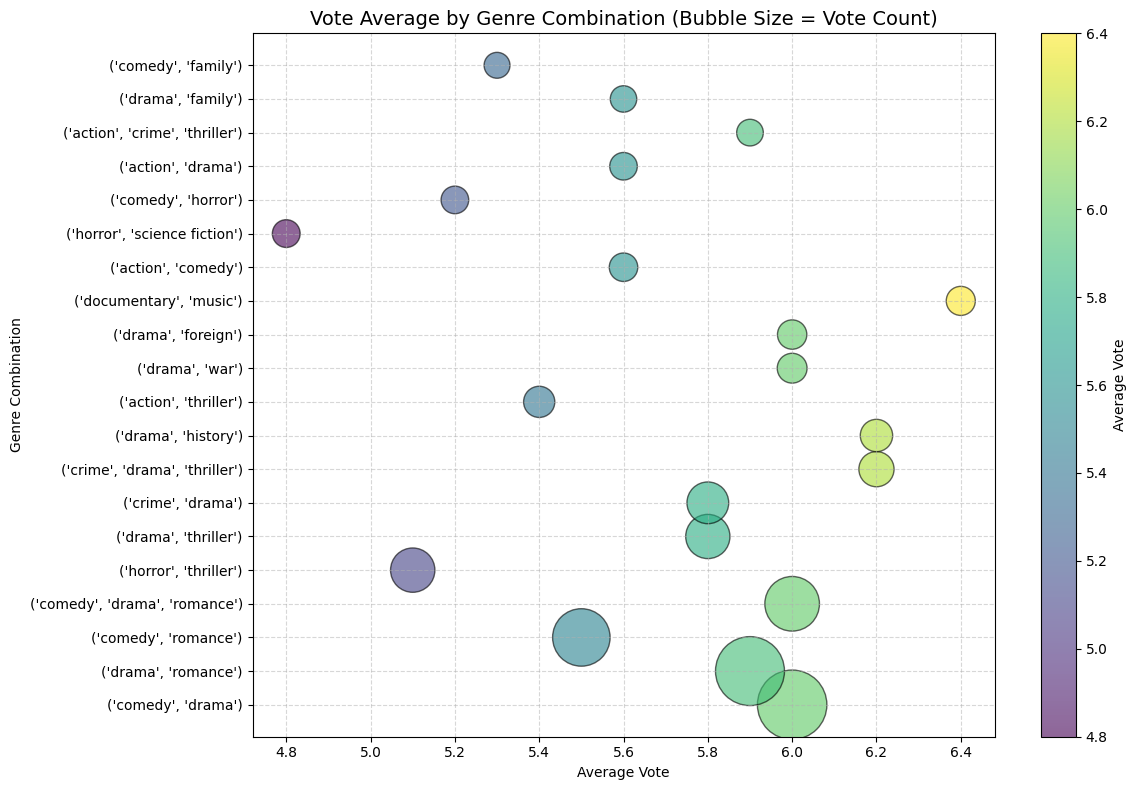

In [84]:
# Use top 15 combinations only for readability
top_combos = genre_combo_stats.head(20)

plt.figure(figsize=(12, 8))
plt.scatter(
    top_combos['vote_average'],
    top_combos['genre_combination'].astype(str),  # Convert tuples to strings for labels
    s=top_combos['vote_count'] * 1.5,  # Bubble size
    c=top_combos['vote_average'],  # Color by IMDb score
    cmap='viridis',
    alpha=0.6,
    edgecolors='black'
)

plt.title('Vote Average by Genre Combination (Bubble Size = Vote Count)', fontsize=14)
plt.xlabel('Average Vote')
plt.ylabel('Genre Combination')
plt.colorbar(label='Average Vote')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Check 5 random descriptions with empty genres

In [85]:
empty_genre_rows = df[df['genres'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
for desc in empty_genre_rows['plot'].dropna().sample(5):
    print(desc)
    print('-' * 100)

Claudia, a single bored Milan travel agent in her thirties, takes evening classes in Russian and tries to get to know her teacher Boris from Kiev. Boris says that he is reluctant to get involved with his student, but asks Claudia to put up his beautiful Ukrainian cousin Olga for a few days while he is away on business. The women get along quite well, but Claudia is distressed when Olga disappears without taking her suitcase, money or passport.
----------------------------------------------------------------------------------------------------
Roberto Orazi turns the camera on the lives of some of those involved in the scourge of the global traffic in human organs: lives united by a momentary hope and separated by that abstract yet insurmountable border called the North-South divide. This shocking documentary exposes the players who claim they know nothing of the crimes they commit.
----------------------------------------------------------------------------------------------------
Afte